### Logistic regression
$$y(x) = wx $$
####  Method y(x) -> [0,1]
$$ sig(x) = \frac{1}{1+e{^{-x}}}$$
#### Costfunction 

$$ Cost(y,h) = \left\{
\begin{aligned}
-log(h), & if&y = 1 \\
-log(1-h), &if&y = 0
\end{aligned}
\right.
$$
#### Condense the two equations into one long equation as follows.
$$Cost(y,h) = -ylog(h) - (1-y)log(1-h)$$


In [22]:
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt 

In [23]:
x1 = np.random.normal(-4, 2, 1000) 
x2 = np.random.normal(4, 2, 1000) 
xs = np.append(x1, x2) 
ys = np.asarray([0.] * len(x1) + [1.] * len(x2)) 

np.asarray 与 np.array 的区别：
<p>其主要区别在于，讲数据变为ndarray格式时，asarray会随着原始的数据变化而变化，而array不会
<p>也就是说当数据源是ndarray时，array仍会copy出一个副本，占用新的内存，但asarray不会

In [26]:
learning_rate = 0.001
training_epochs = 1000
def sigmoid(x):
    #return 1./(1.+np.exp(-x))
    return 1. / (1. + np.exp(-x)) 
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)
def logistic(w,x):
    temp = w[1]*x + w[0]
    out = tf.sigmoid(-temp)
    return out 
w = tf.Variable([0.,0.],trainable=True)
#Model = logistic(w,x)
Model = logistic(w,x)
loss = tf.reduce_mean(-y*tf.log(Model) - (1-y)*tf.log(1 - Model))
train = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

In [32]:
init = tf.global_variables_initializer()
with tf.compat.v1.Session() as sess:
    sess.run(init)
    prev_err = 0
    for epoch in range(training_epochs):
        err, _ = sess.run([loss, train], {x: xs, y: ys})
        print(epoch, err)
        if abs(prev_err - err) < 0.0001: 
            break
        prev_err = err 
    w_val = sess.run(w, {X: xs, Y: ys})

0 0.69314593
1 0.68921477
2 0.6853213
3 0.68146574
4 0.67764825
5 0.6738674
6 0.6701242
7 0.6664171
8 0.66274667
9 0.6591117
10 0.65551245
11 0.6519487
12 0.64841914
13 0.64492446
14 0.64146364
15 0.63803613
16 0.6346425
17 0.6312817
18 0.6279536
19 0.62465745
20 0.6213935
21 0.61816126
22 0.6149601
23 0.6117898
24 0.60865015
25 0.60554063
26 0.60246134
27 0.5994115
28 0.5963904
29 0.5933988
30 0.5904356
31 0.587501
32 0.5845942
33 0.58171475
34 0.5788628
35 0.57603806
36 0.57324004
37 0.57046837
38 0.5677229
39 0.5650035
40 0.56230927
41 0.5596404
42 0.5569967
43 0.5543778
44 0.5517831
45 0.54921263
46 0.54666615
47 0.5441431
48 0.5416433
49 0.53916675
50 0.536713
51 0.53428185
52 0.53187287
53 0.5294861
54 0.52712095
55 0.52477735
56 0.5224553
57 0.520154
58 0.51787364
59 0.51561385
60 0.5133744
61 0.511155
62 0.50895554
63 0.50677574
64 0.50461525
65 0.5024742
66 0.500352
67 0.49824855
68 0.49616376
69 0.49409726
70 0.4920489
71 0.49001864
72 0.48800606
73 0.48601067
74 0.48403284
7

623 0.1811446
624 0.18099423
625 0.18084434
626 0.18069479
627 0.18054561
628 0.18039683
629 0.18024841
630 0.1801004
631 0.17995283
632 0.17980558
633 0.17965877
634 0.1795122
635 0.17936616
636 0.17922042
637 0.17907502
638 0.17893007
639 0.17878541
640 0.17864126
641 0.17849737
642 0.17835383
643 0.17821074
644 0.17806791
645 0.17792559
646 0.17778352
647 0.17764184
648 0.17750046
649 0.1773595
650 0.1772189
651 0.17707866
652 0.17693879
653 0.1767992
654 0.17666
655 0.17652112
656 0.17638257
657 0.17624445
658 0.1761066
659 0.175969
660 0.175832
661 0.17569512
662 0.17555879
663 0.17542258
664 0.17528675
665 0.17515132
666 0.17501618
667 0.17488141
668 0.17474692
669 0.17461285
670 0.17447905
671 0.17434557
672 0.17421247
673 0.17407963
674 0.17394711
675 0.17381497
676 0.1736831
677 0.17355156
678 0.17342038
679 0.1732895
680 0.17315893
681 0.1730287
682 0.17289877
683 0.17276913
684 0.1726398
685 0.17251082
686 0.17238212
687 0.17225376
688 0.17212564
689 0.17199792
690 0.1718703

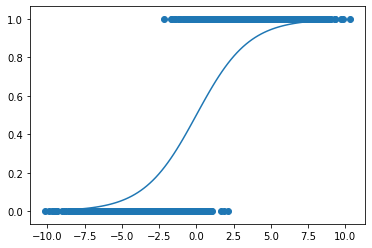

In [34]:
all_xs = np.linspace(-10,10,100)
plt.scatter(xs,ys)
plt.plot(all_xs,sigmoid(-(w_val[1]*all_xs + w_val[0])))
plt.show()

In [4]:
import numpy as np
a = np.array([1,2,3])
b = np.array([4,5,6])
y =  np.asarray(a+b)
z = np.asarray([0.] * 3 + [1.] * 3 )
z1 = np.array([0.] * 3 + [1.] * 3)
print(y)
print(z)
print(z1)

[5 7 9]
[0. 0. 0. 1. 1. 1.]
[0. 0. 0. 1. 1. 1.]
